### Usage of Melnikov et al. encoding (example)

Use hea_env

In [1]:
import tntorch as tnt
import numpy as np
import tensorflow as tf
import torch
import matplotlib.pyplot as plt
import QGOpt as qgo

#note commented from tensorflow.python.distribute import distribution_strategy_context as distribute_ctx
#changed the line to distribute_ctx = tf.distribute
#in c:\Users\0josh\AppData\Local\Programs\Python\Python312\Lib\site-packages\QGOpt\optimizers\Adam.py

import tensornetwork as tn
import my_qprep as qprepfn

from qiskit.quantum_info import Statevector

c:\Users\0josh\miniconda3\envs\HEA_env\Lib\site-packages\cotengra\hyperoptimizers\hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


## e^x

In [10]:
f = lambda x: np.sin(x)
n = 2
domain = [0,1]

#GET MPS REPRESENTATION
psi_tt,norm,info=qprepfn.get_mps_from_func(n,f, domain=domain,eps = 1e-16,return_info=True,rmax=2)

cross device is None
Functions that require cross-approximation can be accelerated with the optional maxvolpy package, which can be installed by 'pip install maxvolpy'. More info is available at https://bitbucket.org/muxas/maxvolpy.
Cross-approximation over a 2D domain containing 4 grid points:
iter: 0  | eps: 2.321e-01 | time:   0.0188 | largest rank:   1
iter: 1  | eps: 0.000e+00 | time:   0.0245 | largest rank:   2 <- converged: eps < 1e-16
Did 18 function evaluations, which took 0.003355s (5365 evals/s)

<class 'tntorch.tensor.Tensor'>


Learning rate = 0.05
Total optimisation iterations = 2000
Lowest error was 0.029411340739438185 at iteration 867


ValueError: too many values to unpack (expected 3)

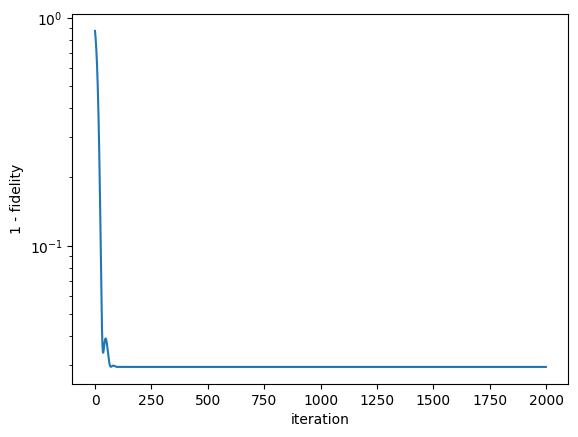

In [11]:
Layers = 0 #zero layers - producct state
max_it = 2000
thresh = 1e-3

#CIRCUIT OPTIMISATION
qc,U,infidelity = qprepfn.qiskit_circuit_from_tt(psi_tt, n, Layers,iters=max_it,eps=thresh)

In [10]:
#SIMULATE CIRCUIT
state = Statevector.from_int(0, 2**n)
state = state.evolve(qc)

#GET RID OF GLOBAL PHASE
phase = np.mean(np.angle(state.data))
phase=np.exp(-1j*phase)

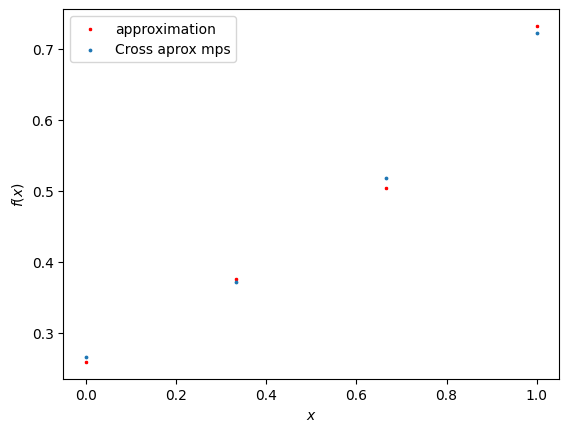

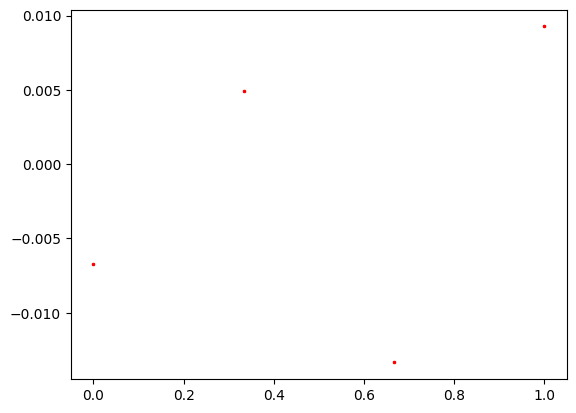

In [12]:
#PLOT RESULTS
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(state.data), label = "approximation",marker='x',s=3,color='r')
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(psi_tt.numpy().reshape(2**n, order = 'F')), s=3,label = "Cross aprox mps")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(state.data)-np.abs(psi_tt.numpy().reshape(2**n, order = 'F')), label = "approximation",marker='x',s=3,color='r')

## f(x) = x

In [4]:
f = lambda x: x
n = 6
domain = [0,1]

#GET MPS REPRESENTATION
psi_tt,norm,info=qprepfn.get_mps_from_func(n,f, domain=domain,eps = 1e-6,return_info=True,rmax=2)

cross device is None
Functions that require cross-approximation can be accelerated with the optional maxvolpy package, which can be installed by 'pip install maxvolpy'. More info is available at https://bitbucket.org/muxas/maxvolpy.
Cross-approximation over a 6D domain containing 64 grid points:
iter: 0  

| eps: 2.077e-01 | time:   0.0275 | largest rank:   1
iter: 1  | eps: 2.020e-07 | time:   0.1018 | largest rank:   2 <- converged: eps < 1e-06
Did 98 function evaluations, which took 0.0005059s (1.937e+05 evals/s)

<class 'tntorch.tensor.Tensor'>


Learning rate = 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

F=3.03 C=4.47 S=4.00 P=8.38: 100%|██████████| 100/100 [00:00<00:00, 1512.11it/s]


Total optimisation iterations = 1500
Lowest error was 0.0008463180187229247 at iteration 1499


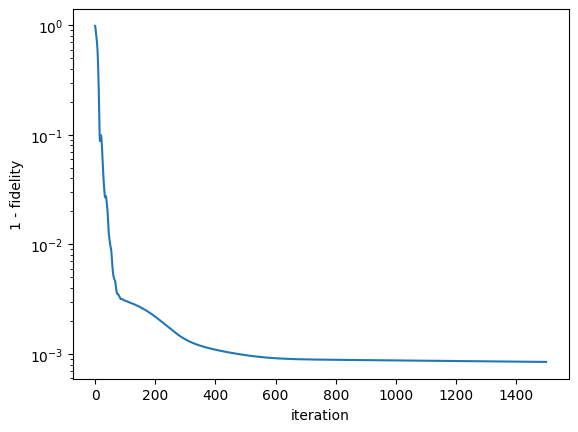

In [6]:
Layers = 2
max_it = 1500
thresh = 1e-10

#CIRCUIT OPTIMISATION
qc,U,infidelity = qprepfn.qiskit_circuit_from_tt(psi_tt, n, Layers,iters=max_it,eps=thresh,contr="cotengra",get_best=True)

In [7]:
#SIMULATE CIRCUIT
state = Statevector.from_int(0, 2**n)
state = state.evolve(qc)

#GET RID OF GLOBAL PHASE
phase = np.mean(np.angle(state.data))
phase=np.exp(-1j*phase)

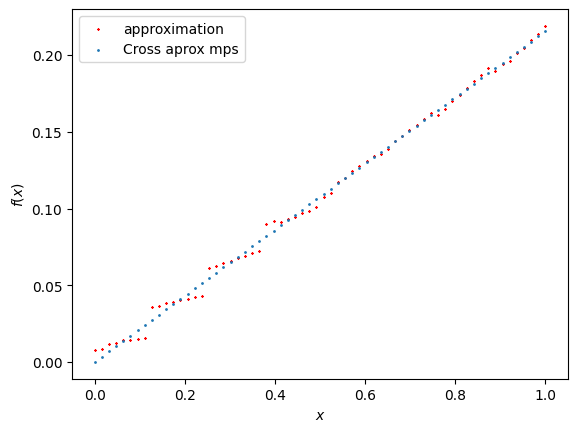

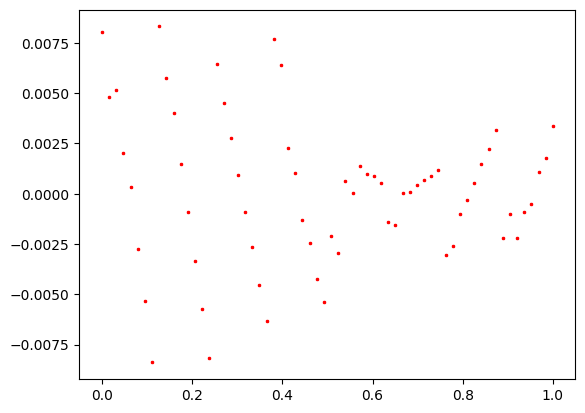

In [8]:
#PLOT RESULTS
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(state.data), label = "approximation",marker='x',s=1,color='r')
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(psi_tt.numpy().reshape(2**n, order = 'F')), s=1,label = "Cross aprox mps")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(state.data)-np.abs(psi_tt.numpy().reshape(2**n, order = 'F')), label = "approximation",marker='x',s=3,color='r')

## Example Linear Piecewise

In [17]:
f = lambda x: max(x-0.5,0)
n = 4
domain = [0,1]

#GET MPS REPRESENTATION
psi_tt,norm,info=qprepfn.get_mps_from_func(n,f, domain=domain,eps = 1e-6,return_info=True,rmax=2)

cross device is None
Functions that require cross-approximation can be accelerated with the optional maxvolpy package, which can be installed by 'pip install maxvolpy'. More info is available at https://bitbucket.org/muxas/maxvolpy.
Cross-approximation over a 4D domain containing 16 grid points:
iter: 0  

| eps: 1.699e-01 | time:   0.1513 | largest rank:   1
iter: 1  | eps: 1.409e-07 | time:   0.2435 | largest rank:   2 <- converged: eps < 1e-06
Did 58 function evaluations, which took 0.002494s (2.326e+04 evals/s)

<class 'tntorch.tensor.Tensor'>


Learning rate = 0.1
Total optimisation iterations = 649
At the last iteration, 1 - fidelity =  -5.877194553249865e-08


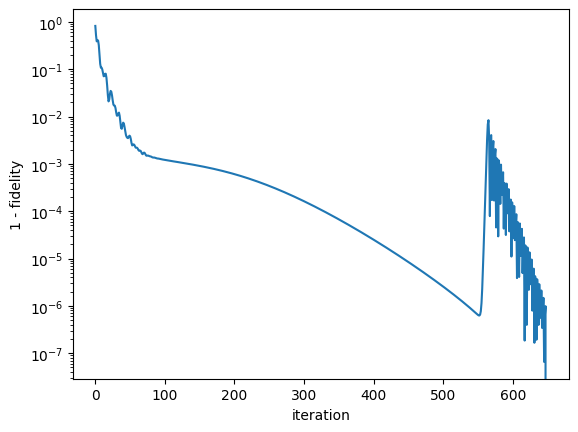

In [18]:
Layers = 2
max_it = 750
thresh = 1e-10

#CIRCUIT OPTIMISATION
qc,U,infidelity = qprepfn.qiskit_circuit_from_tt(psi_tt, n, Layers,iters=max_it,eps=thresh)

In [19]:
#SIMULATE CIRCUIT
state = Statevector.from_int(0, 2**n)
state = state.evolve(qc)

#GET RID OF GLOBAL PHASE
phase = np.mean(np.angle(state.data))
phase=np.exp(-1j*phase)

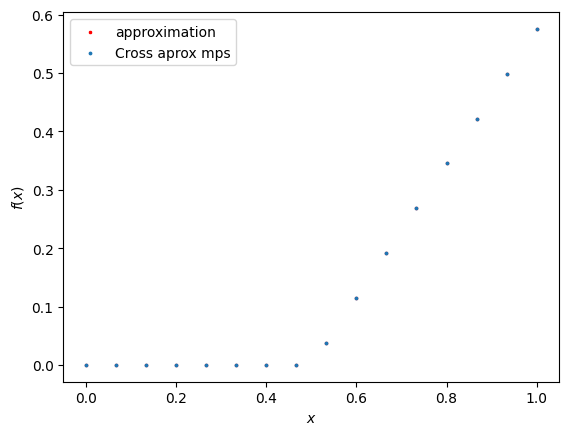

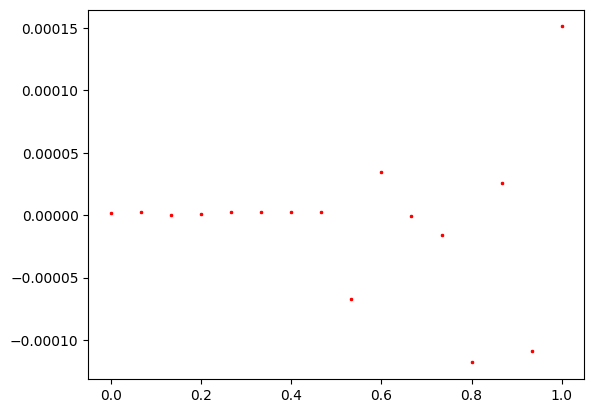

In [20]:
#PLOT RESULTS
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(state.data), label = "approximation",marker='x',s=3,color='r')
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(psi_tt.numpy().reshape(2**n, order = 'F')), s=3,label = "Cross aprox mps")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(state.data)-np.abs(psi_tt.numpy().reshape(2**n, order = 'F')), label = "approximation",marker='x',s=3,color='r')

## Example Polynomial Piecewise

In [115]:
f = lambda x: x**2 if x < 0.5 else (x-1)**2

n = 15
domain = [-1,1]

#GET MPS REPRESENTATION
psi_tt,norm,info=qprepfn.get_mps_from_func(n,f, domain=domain,eps = 1e-6,return_info=True)

cross device is None
Functions that require cross-approximation can be accelerated with the optional maxvolpy package, which can be installed by 'pip install maxvolpy'. More info is available at https://bitbucket.org/muxas/maxvolpy.
Cross-approximation over a 15D domain containing 32768 grid points:
iter: 0  | eps: 8.831e-01 | time:   0.2505 | largest rank:   1
iter: 1  | eps: 5.294e-07 | time:   0.6735 | largest rank:   4 <- converged: eps < 1e-06
Did 838 function evaluations, which took 0.01529s (5.481e+04 evals/s)

<class 'tntorch.tensor.Tensor'>


Learning rate = 0.05
Total optimisation iterations = 100
Lowest error was 0.0018134377444412042 at iteration 99


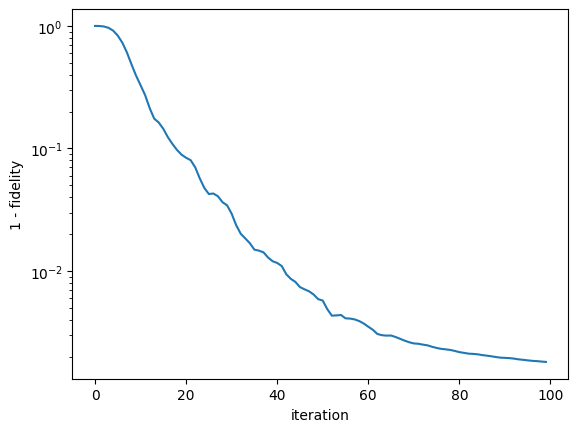

In [116]:
Layers = 5
max_it = 100
thresh = 1e-10

#CIRCUIT OPTIMISATION
qc,U,infidelity = qprepfn.qiskit_circuit_from_tt(psi_tt, n, Layers,iters=max_it,eps=thresh)

In [117]:
#SIMULATE CIRCUIT
state = Statevector.from_int(0, 2**n)
state = state.evolve(qc)

#GET RID OF GLOBAL PHASE
phase = np.mean(np.angle(state.data))
phase=np.exp(-1j*phase)

real_state = state.data*phase

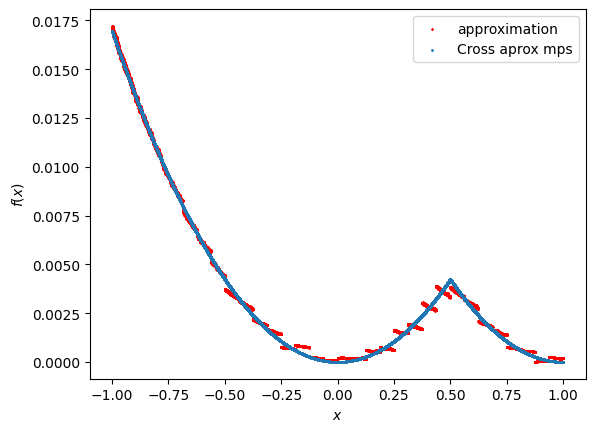

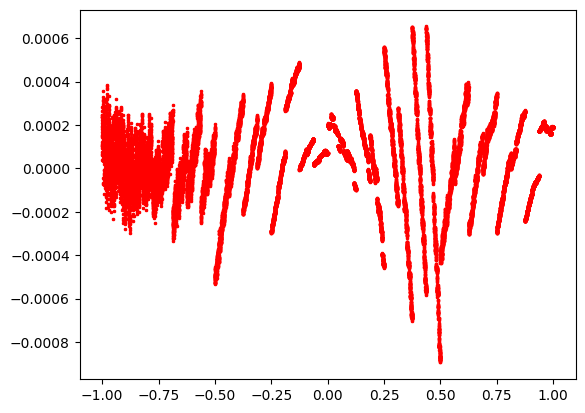

In [119]:
#PLOT RESULTS
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(state.data), label = "approximation",marker='x',s=1,color='r')
plt.scatter(np.linspace(domain[0],domain[1],2**n), psi_tt.numpy().reshape(2**n, order = 'F'), s=1,label = "Cross aprox mps")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(state.data)-np.abs(psi_tt.numpy().reshape(2**n, order = 'F')), label = "approximation",marker='x',s=3,color='r')

## Complex Function Example

In [166]:
f = lambda x: (
    4 * x if x < 0.25 else
    1 if x < 0.5 else
    -4 * (x - 0.75) + 2 if x < 0.75 else
    4 * (x - 0.75)
)

n = 6
domain = [0,1]

#GET MPS REPRESENTATION
psi_tt,norm,info=qprepfn.get_mps_from_func(n,f, domain=domain,eps = 1e-6,return_info=True)

cross device is None
Functions that require cross-approximation can be accelerated with the optional maxvolpy package, which can be installed by 'pip install maxvolpy'. More info is available at https://bitbucket.org/muxas/maxvolpy.
Cross-approximation over a 6D domain containing 64 grid points:
iter: 0  

| eps: 4.653e-01 | time:   0.1427 | largest rank:   1
iter: 1  | eps: 3.743e-07 | time:   0.2212 | largest rank:   4 <- converged: eps < 1e-06
Did 226 function evaluations, which took 0.002514s (8.988e+04 evals/s)

<class 'tntorch.tensor.Tensor'>


Learning rate = 0.05
Total optimisation iterations = 100
Lowest error was 0.011299008462375526 at iteration 99


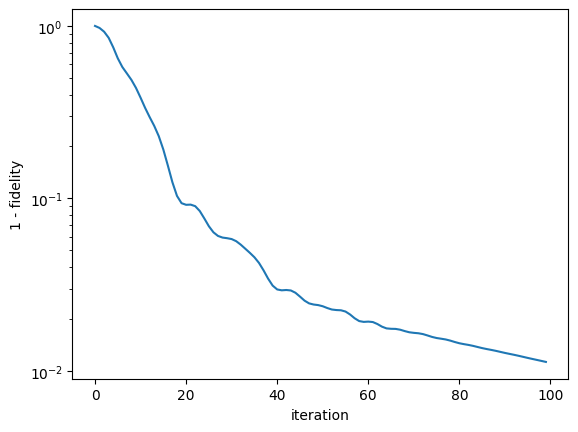

In [167]:
Layers = 3
max_it = 100
thresh = 1e-10

#CIRCUIT OPTIMISATION
qc,U,infidelity = qprepfn.qiskit_circuit_from_tt(psi_tt, n, Layers,iters=max_it,eps=thresh)

In [168]:
#SIMULATE CIRCUIT
state = Statevector.from_int(0, 2**n)
state = state.evolve(qc)

#GET RID OF GLOBAL PHASE
phase = np.mean(np.angle(state.data))
phase=np.exp(-1j*phase)

real_state = state.data*phase

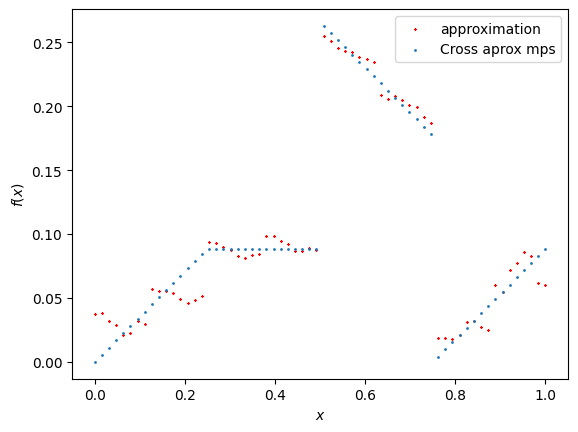

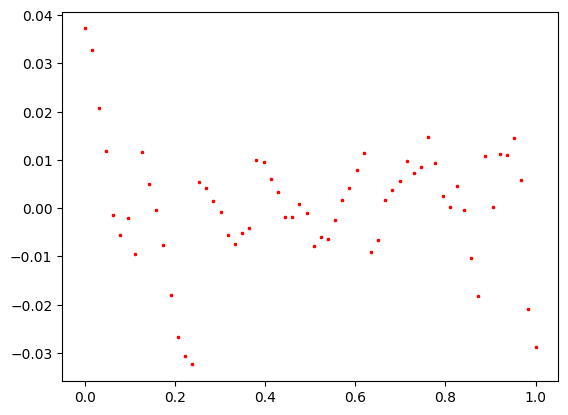

In [169]:
#PLOT RESULTS
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(state.data), label = "approximation",marker='x',s=1,color='r')
plt.scatter(np.linspace(domain[0],domain[1],2**n), psi_tt.numpy().reshape(2**n, order = 'F'), s=1,label = "Cross aprox mps")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(state.data)-np.abs(psi_tt.numpy().reshape(2**n, order = 'F')), label = "approximation",marker='x',s=3,color='r')

## Represent function as an MPS

In [3]:
# In this example we want to prepare a gaussian function with expected value 0.5 and variance 0.01 
#f = lambda x: np.exp(-(x-0.5)**2/(2*0.01))/np.sqrt(2*np.pi*0.01)
#f = lambda x: 0.2*x**3-0.5*x**2 + 0.5*x + 1
f= lambda x: np.exp(x)
#f = lambda x: x
#f= lambda x: np.sin(x)

# First of all, we choose the number of qubits in the quantum state of which we will write this function

n = 5# 2**n - the number of sampling points
domain=[0,1]

In [4]:
# Now get the MPS from the function f(x)
psi_tt,norm,info=qprepfn.get_mps_from_func(n,f, domain=domain,eps = 1e-6,return_info=True,rmax=2)

cross device is None
Functions that require cross-approximation can be accelerated with the optional maxvolpy package, which can be installed by 'pip install maxvolpy'. More info is available at https://bitbucket.org/muxas/maxvolpy.
Cross-approximation over a 5D domain containing 32 grid points:
iter: 0  | eps: 1.918e-16 | time:   0.0259 | largest rank:   1 <- converged: eps < 1e-06
Did 18 function evaluations, which took 0.001158s (1.554e+04 evals/s)

<class 'tntorch.tensor.Tensor'>


## Get a circuit

In [5]:
# Choose the number of layers in the scheme that will be optimized
Layers = 3

At the last iteration, 1 - fidelity =  8.602007994795713e-13


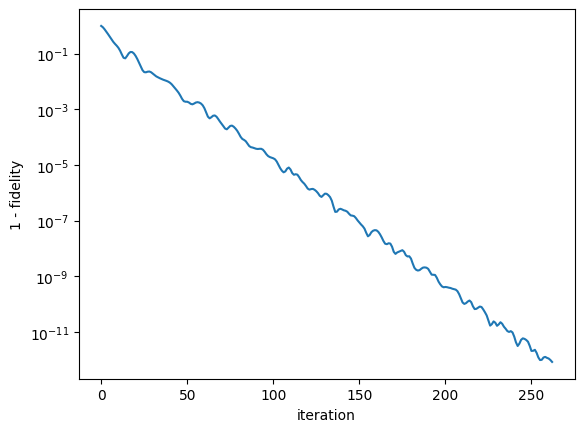

In [6]:

qc, U,infidelity = qprepfn.qiskit_circuit_from_tt(psi_tt, n, Layers,iters=2000,eps=1e-12)

In [7]:
# Simulate the action of the resultimg quantum circuit

from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**n)

# Evolve the state by the quantum circuit

state = state.evolve(qc)

In [8]:
print(np.abs(state))

[0.09840925 0.10163534 0.10496743 0.10840859 0.11196278 0.11563341
 0.11942429 0.12333931 0.12738319 0.13155909 0.1358723  0.14032661
 0.14492725 0.1496784  0.15458543 0.15965346 0.16488762 0.170293
 0.17587604 0.18164181 0.18759695 0.19374704 0.20009874 0.20665875
 0.2134341  0.22043093 0.22765781 0.23512112 0.24282961 0.25079043
 0.25901233 0.26750375]


In [9]:
print(qc)
print(U)

        ┌──────────────────────────┐                                »
q_0: ───┤ U(2.2164,1.6283,-2.8439) ├─────────────────■──────────────»
        ├──────────────────────────┤               ┌─┴─┐            »
q_1: ───┤ U(0.55646,-1.683,1.7233) ├───────────────┤ X ├────────────»
       ┌┴──────────────────────────┤               └───┘            »
q_2: ──┤ U(2.1669,0.68154,0.26539) ├─────────────────■──────────────»
     ┌─┴───────────────────────────┴──┐            ┌─┴─┐            »
q_3: ┤ U(1.5708,-4.1276e-07,-0.11915) ├────────────┤ X ├────────────»
     └─┬────────────────────────────┬─┘┌───────────┴───┴───────────┐»
q_4: ──┤ U(1.9886,-2.1622,-0.23624) ├──┤ U(0.30648,1.8175,-1.6955) ├»
       └────────────────────────────┘  └───────────────────────────┘»
«     ┌─────────────────────────────┐┌──────────────────────────┐»
«q_0: ┤ U(2.8002,-0.29379,-0.40081) ├┤ U(2.857,-1.1581,0.36389) ├»
«     └┬───────────────────────────┬┘└──────────────────────────┘»
«q_1: ─┤ U(0.48545,-1.4831,-2

In [10]:
np.angle(0.00954603-0.01107177j), np.angle(0.00952221-0.01275586j),np.angle(0.1226823 -0.1907694j)

phase = np.mean(np.angle(state.data))
phase=np.exp(-1j*phase)

In [11]:
np.abs(psi_tt.numpy().reshape(2**n, order = 'F'))

array([0.09840916, 0.10163541, 0.10496742, 0.10840867, 0.11196274,
       0.11563333, 0.11942425, 0.12333945, 0.12738301, 0.13155914,
       0.13587217, 0.14032661, 0.14492707, 0.14967836, 0.15458542,
       0.15965334, 0.16488742, 0.17029309, 0.17587597, 0.18164189,
       0.18759684, 0.19374701, 0.20009881, 0.20665885, 0.21343396,
       0.22043117, 0.22765779, 0.23512132, 0.24282954, 0.25079046,
       0.25901237, 0.26750383])

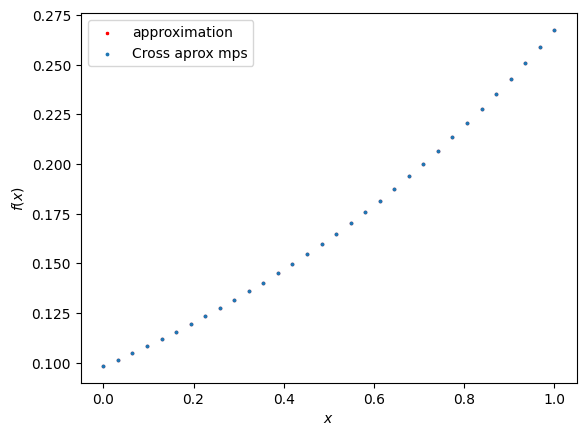

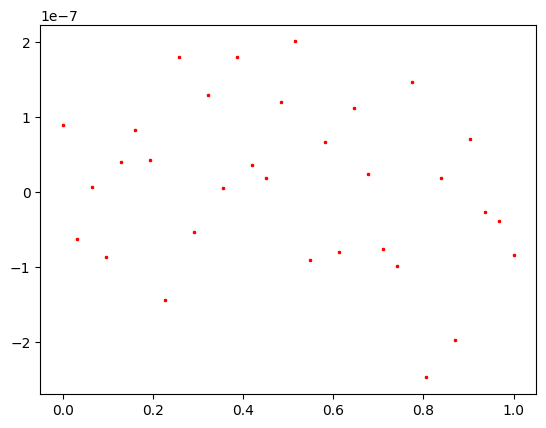

In [12]:
# Visualize the resulting function and the target one
# psi_tt.full().reshape(2**n, order = 'F')
#set figure size
#plt.figure(figsize=(20, 10))
#create two side by side plots one with aprox vs exact and one with the risiduals

plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(state.data), label = "approximation",marker='x',s=3,color='r')
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(psi_tt.numpy().reshape(2**n, order = 'F')), s=3,label = "Cross aprox mps")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
plt.scatter(np.linspace(domain[0],domain[1],2**n), np.abs(state.data)-np.abs(psi_tt.numpy().reshape(2**n, order = 'F')), label = "approximation",marker='x',s=3,color='r')


# Plotting various results

In [202]:
import pickle
import matplotlib.pyplot as plt

with open('trials/gaussian_4_1.pkl', 'rb') as f:
    data = pickle.load(f)

data.keys()





dict_keys(['psi_tt', 'state', 'L', 'n', 'time_get_mps', 'time_qiskit', 'infidelity', 'info'])

In [203]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the directory path where your files are located
directory_path = "trials"


# Load data from pickle file
def load_data(filename):
    with open(os.path.join(directory_path, filename), 'rb') as f:
        data = pickle.load(f)
    return data

# Function to calculate Gaussian approximation
def calculate_cumer(data):
    state = np.abs(data['state'])
    psi_tt = np.abs(np.reshape(data['psi_tt'].numpy(), (2**data['n'],), order='F'))
    return np.sum(np.abs(state - psi_tt))

# get the fidelity
def calculate_fidelity(data):
    state = np.abs(data['state'])
    psi_tt = np.reshape(data['psi_tt'].numpy(), (2**data['n'],), order='F')
    #difference is likely due to global phase and jsut using absolute
    #print("Actual: ",np.abs(np.dot(state, np.abs(psi_tt)))**2,"Returned: ",1-data['infidelity'])
    return np.abs(np.dot(state, np.abs(psi_tt)))**2

# get the maximum rank
def calculate_max_rank(data_files):
    for data_file in data_files:
        data = load_data(data_file)
        info = data['info']
        print("qubits: ",data['n'],"Max rank: ",max(info['Rs']),"cross aprox error: ",info['val_epss'][-1],"was reached in ",len(info['val_epss']),"iterations")

#plot an example
def plotter(data):
    state = np.abs(data['state'])
    psi_tt = np.reshape(data['psi_tt'].numpy(), (2**data['n'],), order='F')
    plt.scatter(np.linspace(0,1,2**data['n']), np.abs(state), label = "approximation",marker='x',s=3,color='r')
    plt.plot(np.linspace(0,1,2**data['n']), np.abs(psi_tt), label = "exact")
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.show()
    plt.scatter(np.linspace(0,1,2**data['n']), np.abs(state)-np.abs(psi_tt), label = "approximation",marker='x',s=3,color='r')
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.show()
# Plot Gaussian approximation vs number of layers for each unique n
def plot_cumer_vs_layers(data_files, function_name):
    n_values = set()  # Set to store unique n values
    data_by_n = {}  # Dictionary to store data grouped by n value

    # Group data files by n value
    for data_file in data_files:
        data = load_data(data_file)
        n = data['n']
        if n not in data_by_n:
            data_by_n[n] = []
        data_by_n[n].append((data['L'], calculate_cumer(data)))
        n_values.add(n)

    # Plot data for each unique n value
    plt.figure(figsize=(20, 12))
    for n in sorted(n_values):
        data_points = data_by_n[n]
        num_layers, gaussian_approximations = zip(*data_points)
        plt.scatter(num_layers, gaussian_approximations, marker='o', label=f'n={n}')

    plt.title(f'Approximation Cumulative Error vs Number of Layers ({function_name})')
    plt.xlabel('Number of Layers')
    plt.ylabel('Cumulative Error')
    plt.legend()
    plt.grid(True)
    plt.show()


In [209]:
# Plot Gaussian approximation vs number of layers for each unique n
from matplotlib.ticker import LogLocator
def plot_fid_vs_layers(data_files, function_name):
    n_values = set()  # Set to store unique n values
    data_by_n = {}  # Dictionary to store data grouped by n value

     # Group data files by n value
    for data_file in data_files:
        data = load_data(data_file)
        n = data['n']
        if n not in data_by_n:
            data_by_n[n] = []
        data_by_n[n].append((data['L'], calculate_fidelity(data)))
        n_values.add(n)

    # Plot data for each unique n value
    plt.figure(figsize=(20, 12))
    for n in sorted(n_values):
        data_points = data_by_n[n]
        num_layers, gaussian_approximations = zip(*data_points)
        plt.scatter(num_layers, gaussian_approximations, marker='o', label=f'n={n}')

    plt.title(f'Fidelity vs Number of Layers ({function_name})')
    plt.xlabel('Number of Layers')
    plt.ylabel('Fidelity')
    plt.legend()
    # Set logarithmic scale on the y-axis
    plt.yscale('log')

    y_ticks = [0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.998, 0.999, 1.0]
    plt.yticks(y_ticks)

    # Add grid for better visibility
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Labels and title
    plt.xlabel('Number of Layers')
    plt.ylabel('Fidelity')
    plt.title(f'Approximation Cumulative Error vs Number of Layers ({function_name})')
    plt.legend()

    # Show plot
    plt.show()


In [210]:
# Get all files in the directory
files = os.listdir(directory_path)

# Filter files that start with "gaussian"
files = [file for file in files if file.startswith("poly")]
function_name = 'Gaussian Distribution'

# Plot Gaussian approximation vs number of layers
calculate_max_rank(files)

qubits:  4 Max rank:  4 cross aprox error:  tensor(2.6771e-07) was reached in  25 iterations
qubits:  4 Max rank:  4 cross aprox error:  tensor(2.6771e-07) was reached in  25 iterations
qubits:  5 Max rank:  4 cross aprox error:  tensor(3.9208e-07) was reached in  25 iterations
qubits:  7 Max rank:  8 cross aprox error:  tensor(4.8710e-07) was reached in  25 iterations
qubits:  7 Max rank:  8 cross aprox error:  tensor(4.8710e-07) was reached in  25 iterations
qubits:  7 Max rank:  8 cross aprox error:  tensor(4.8710e-07) was reached in  25 iterations
qubits:  5 Max rank:  4 cross aprox error:  tensor(3.9208e-07) was reached in  25 iterations
qubits:  7 Max rank:  8 cross aprox error:  tensor(4.8710e-07) was reached in  25 iterations
qubits:  5 Max rank:  4 cross aprox error:  tensor(3.9208e-07) was reached in  25 iterations
qubits:  5 Max rank:  4 cross aprox error:  tensor(3.9208e-07) was reached in  25 iterations
qubits:  7 Max rank:  8 cross aprox error:  tensor(4.8710e-07) was rea

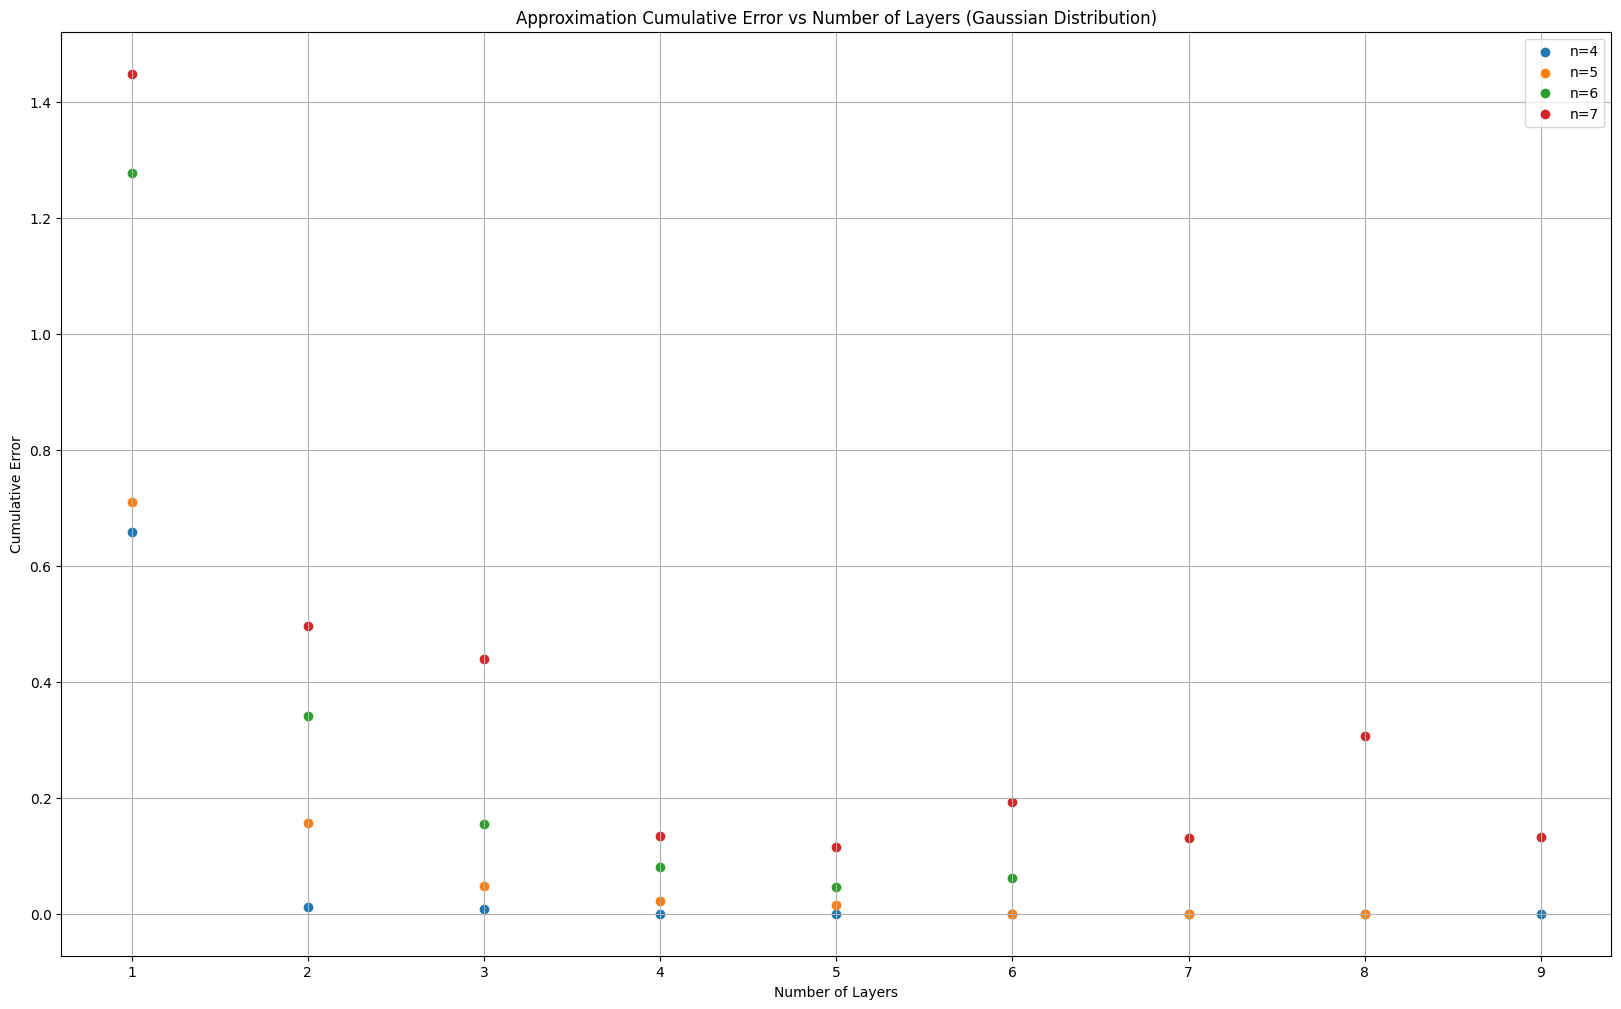

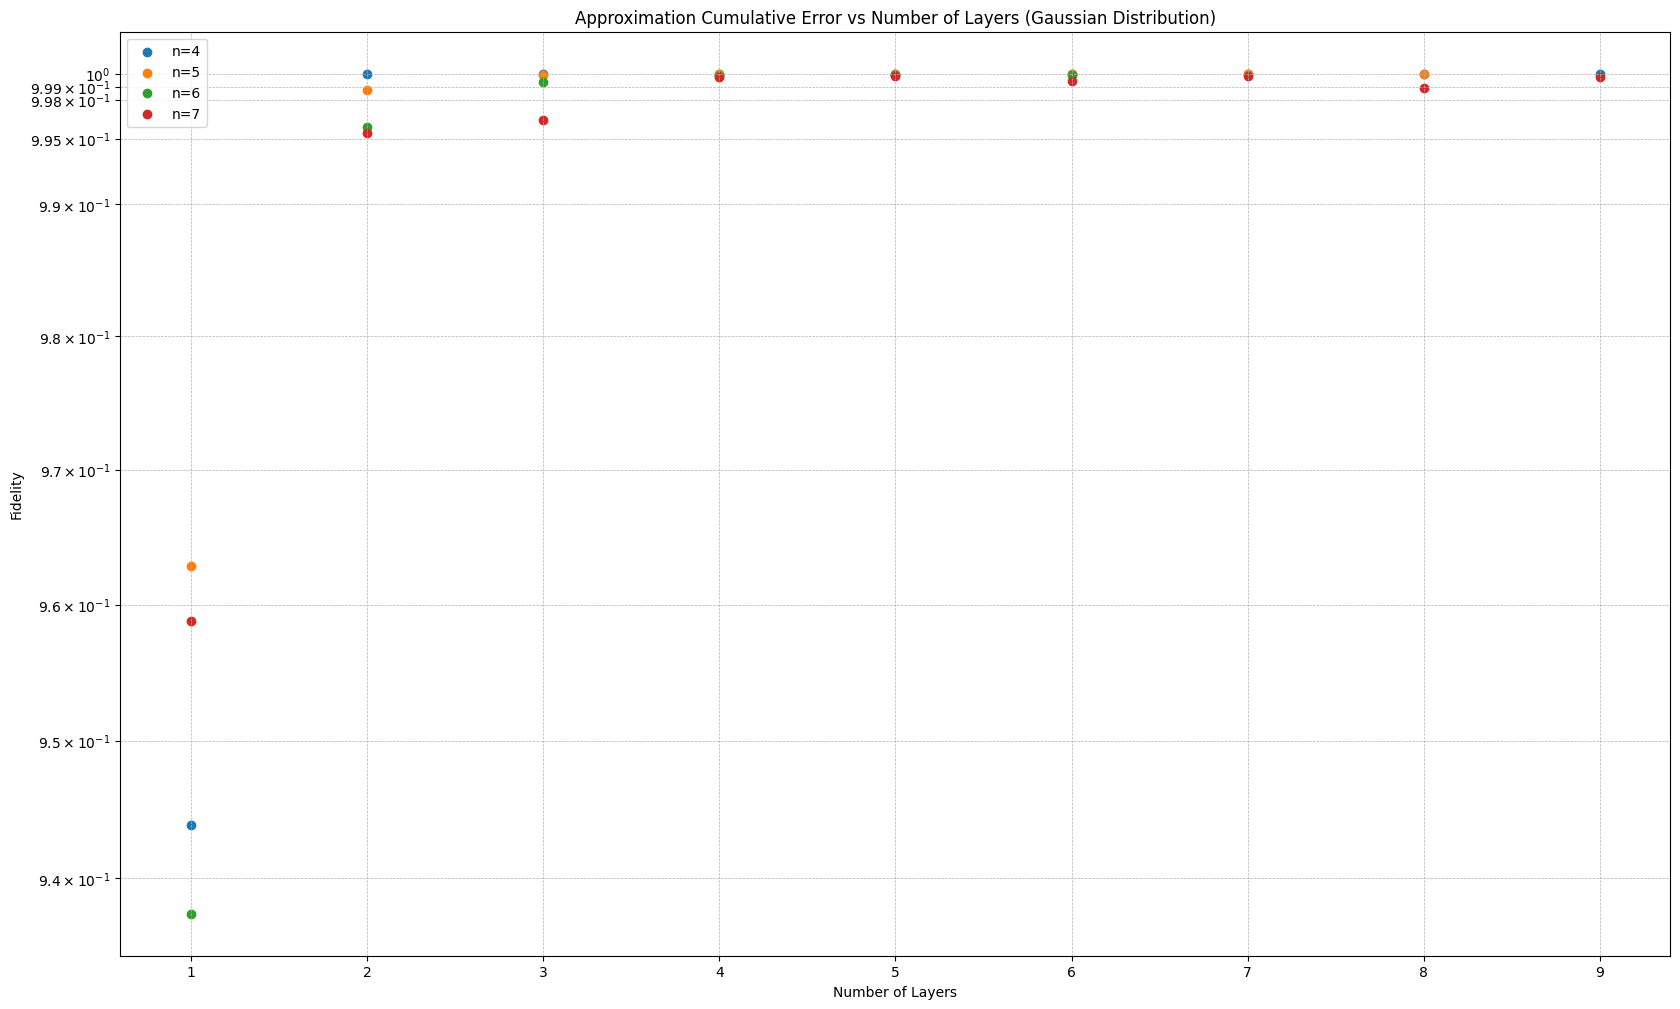

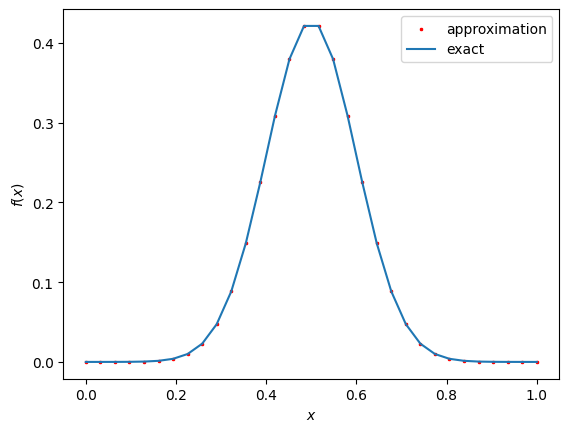

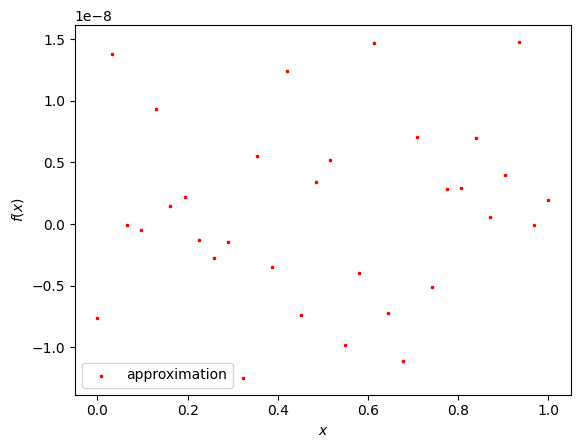

In [211]:
# Get all files in the directory
files = os.listdir(directory_path)

# Filter files that start with "gaussian"
files = [file for file in files if file.startswith("gaussian")]
function_name = 'Gaussian Distribution'

# Plot Gaussian approximation vs number of layers
plot_cumer_vs_layers(files, function_name)
plot_fid_vs_layers(files, function_name)
plotter(load_data('gaussian_5_8.pkl'))

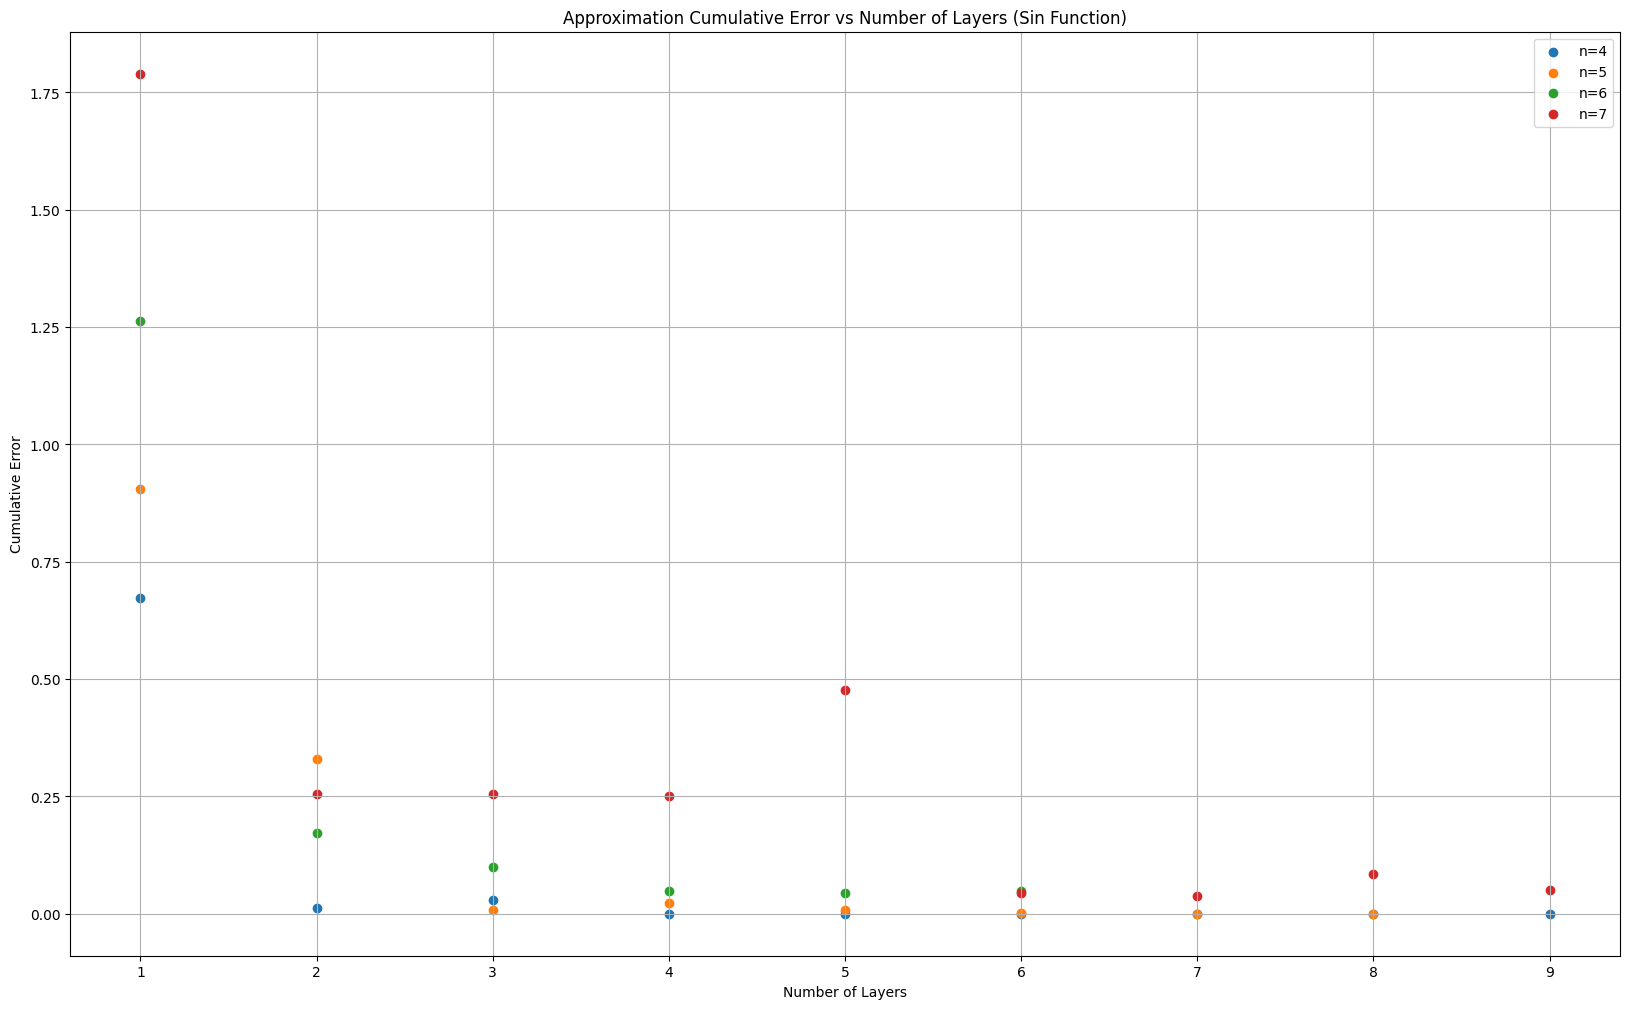

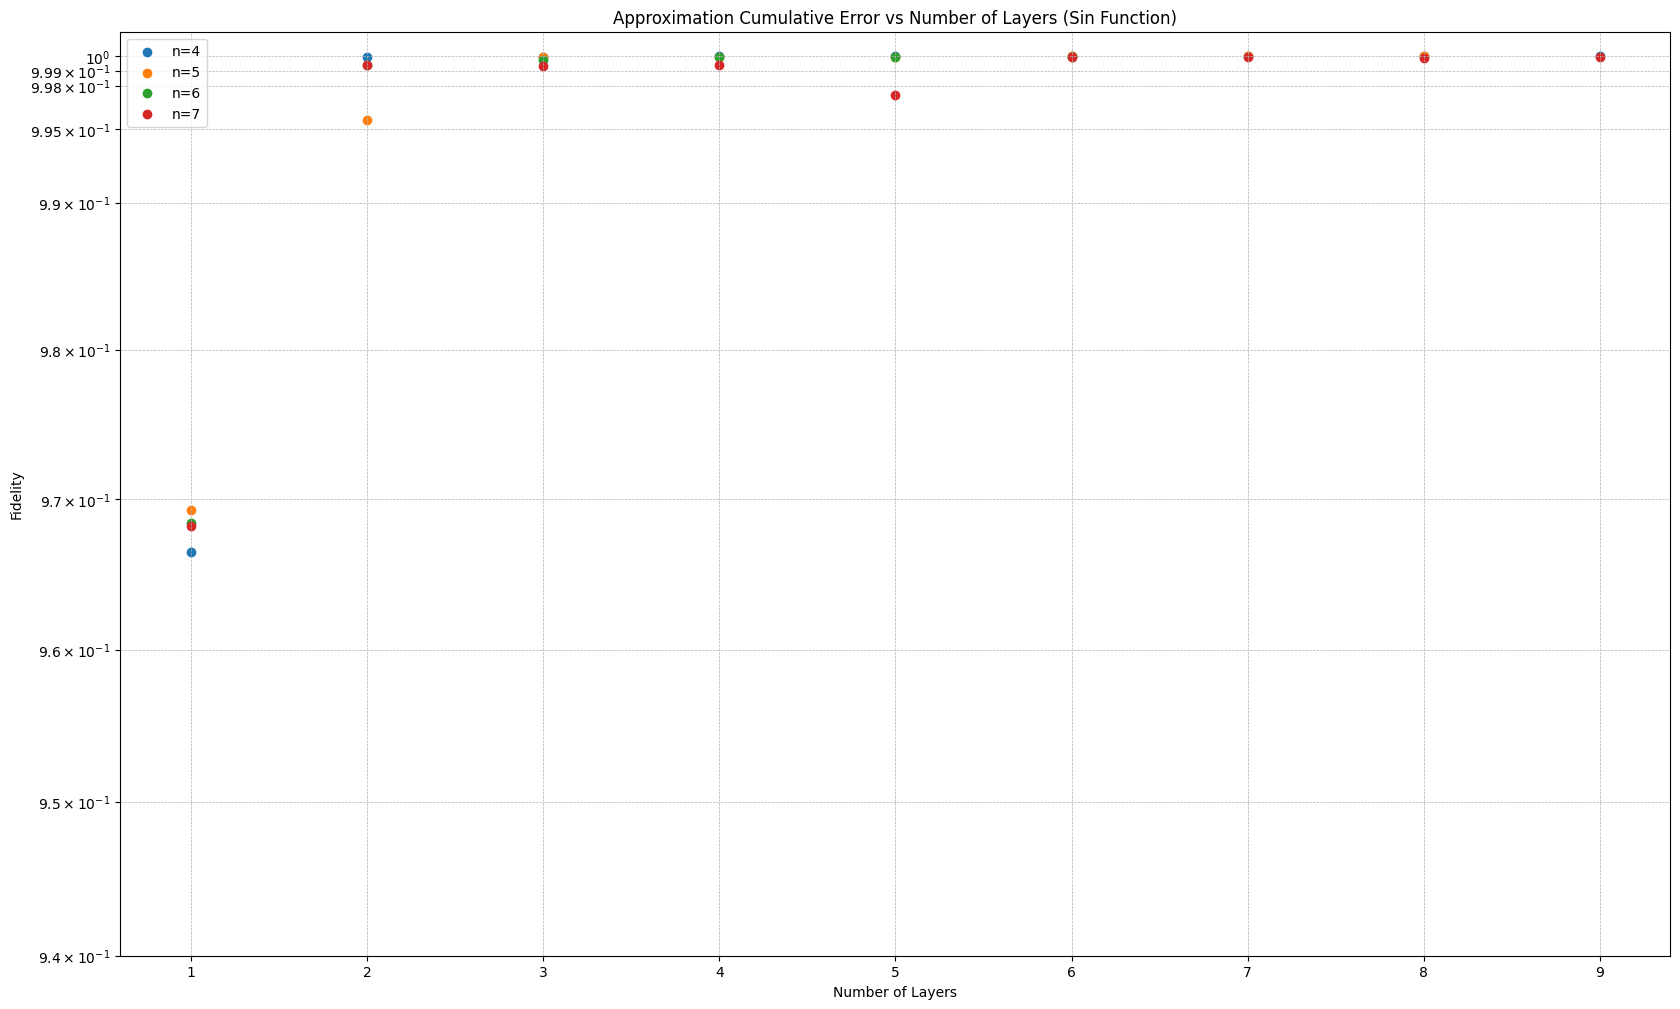

In [212]:
# Define the directory path where your files are located
directory_path = "trials"

# Get all files in the directory
files = os.listdir(directory_path)

# Filter files that start with "gaussian"
files = [file for file in files if file.startswith("sin")]


function_name = 'Sin Function'

# Plot Gaussian approximation vs number of layers
plot_cumer_vs_layers(files, function_name)
plot_fid_vs_layers(files, function_name)

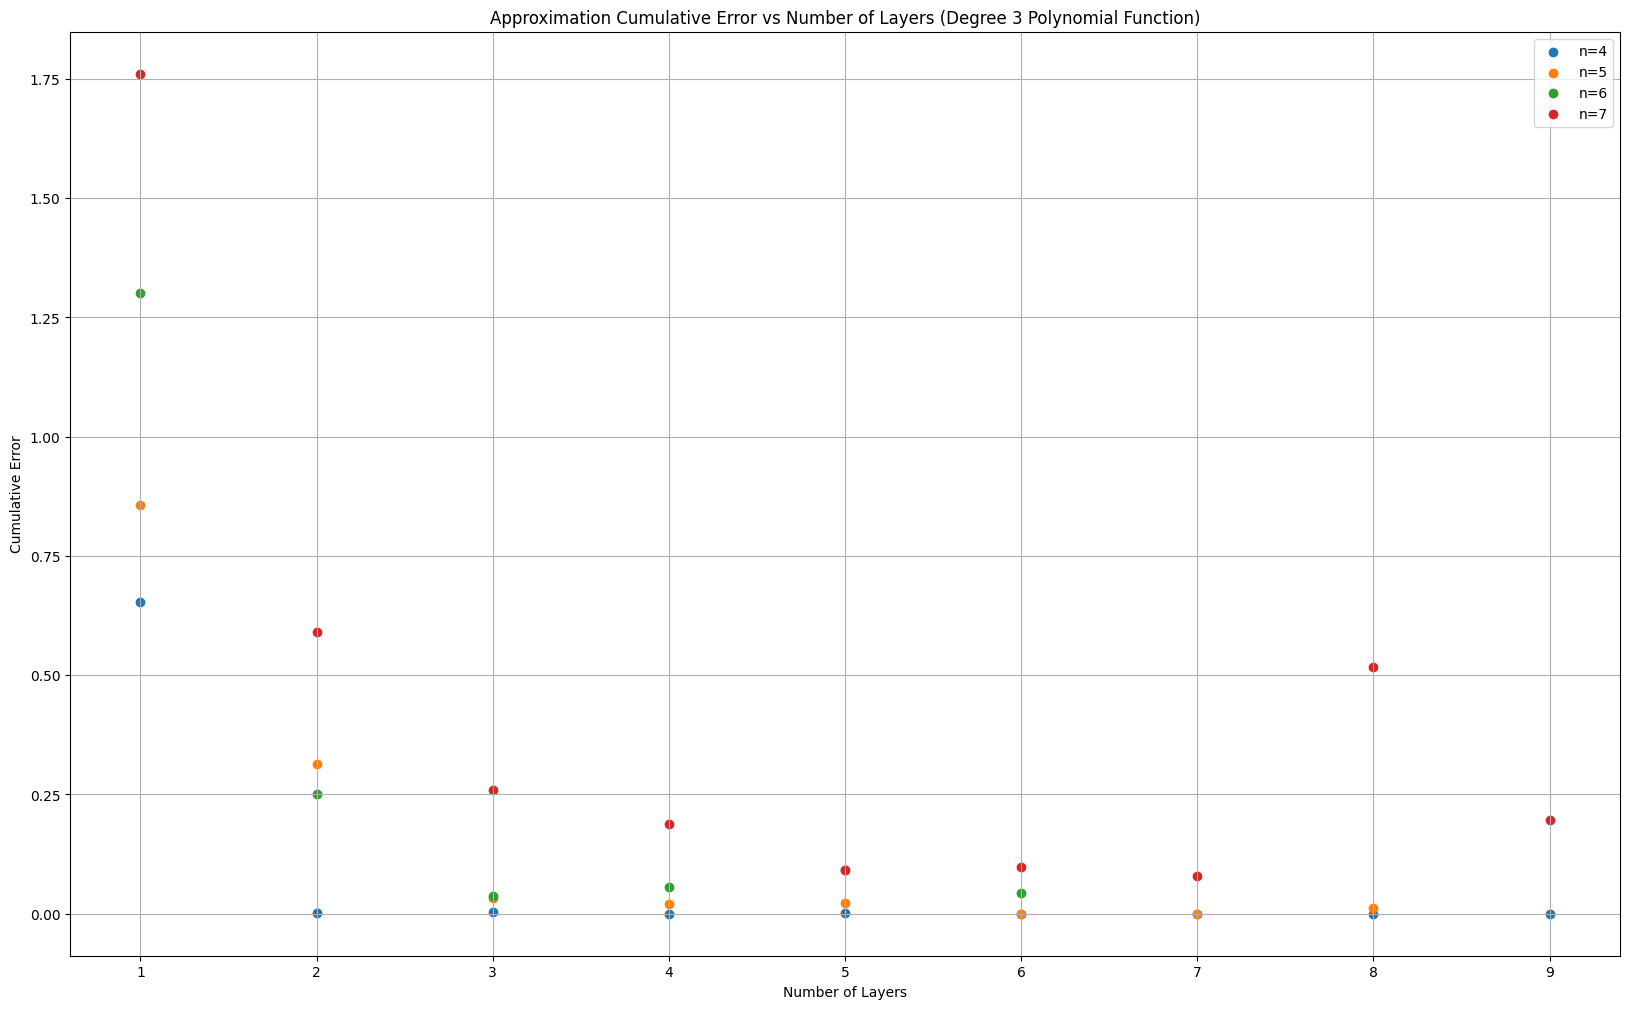

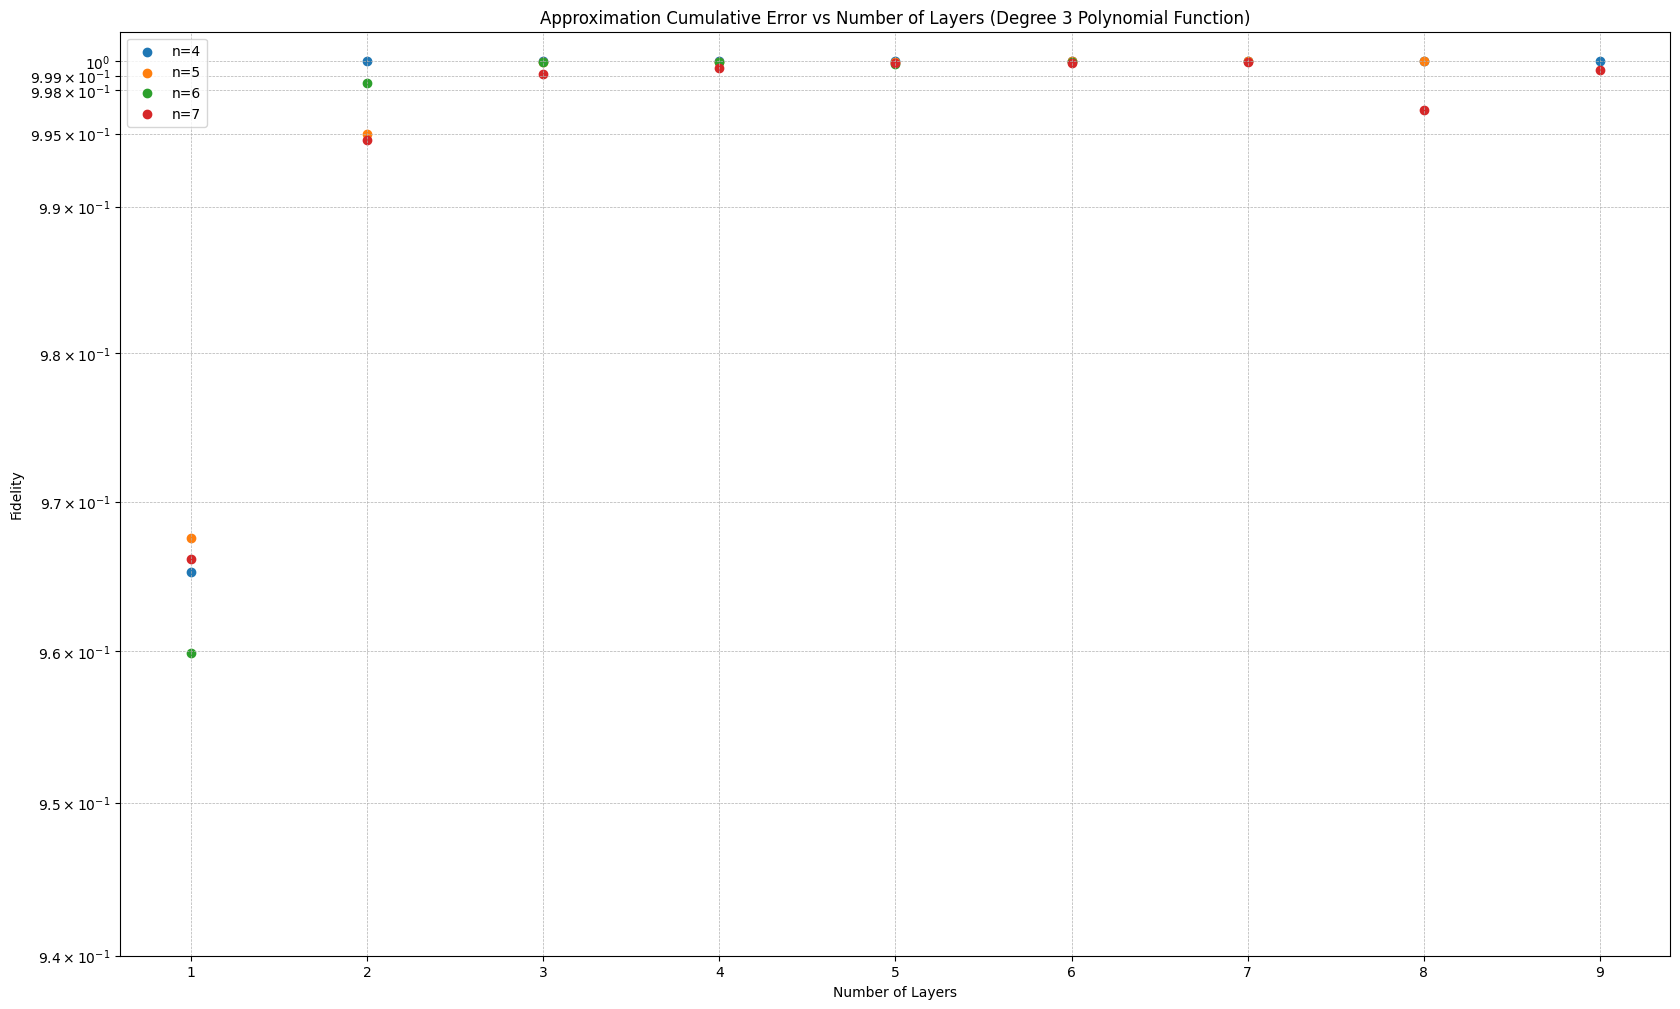

In [213]:
# Define the directory path where your files are located
directory_path = "trials"

# Get all files in the directory
files = os.listdir(directory_path)

# Filter files that start with "gaussian"
files = [file for file in files if file.startswith("poly")]


function_name = 'Degree 3 Polynomial Function'

# Plot Gaussian approximation vs number of layers
plot_cumer_vs_layers(files, function_name)
plot_fid_vs_layers(files, function_name)